# Section 1: Project Overview & Objectives

Business Goal: Performing global retail audit lightly just to identify growth opportunities in the markets and minimize operational risks. **bold text**

In [142]:
#toolofSQL
!pip install pandasql

In [143]:
import pandas as pd
from pandasql import sqldf

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/Strategic Cross Border Analyst USP/Sales Transaction v.4a.csv'

df=pd.read_csv(file_path)

In [146]:
#data clean
df.columns = [c.strip().lower().replace(' ', '') for c in df.columns]
#remvoing duplicates
df = df.drop_duplicates()
#handling null values
df = df.dropna(subset=['customerno', 'productname'])

In [147]:
#running SQL easier
pysqldf = lambda q: sqldf(q, globals())

In [148]:
#first 5 rows
display(df.head())

,transactionno,date,productno,productname,price,quantity,customerno,country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [149]:
print(df.columns.tolist())

['transactionno', 'date', 'productno', 'productname', 'price', 'quantity', 'customerno', 'country']


In [150]:
query = """
SELECT
    productname,
    SUM(quantity) AS units_sold,
    SUM(quantity * price) AS total_revenue
FROM df
GROUP BY productname
ORDER BY total_revenue DESC
LIMIT 10
"""
# Running the query
revenue_table = sqldf(query, locals())
print(revenue_table)

                          productname  units_sold  total_revenue
0                      Popcorn Holder       56431      583075.23
1   World War 2 Gliders Asstd Designs       53751      556157.63
2           Paper Craft Little Birdie           0      501359.05
3  Cream Hanging Heart T-Light Holder       35359      451163.73
4       Assorted Colour Bird Ornament       36346      419557.68
5     Pack Of 72 Retrospot Cake Cases       36208      388180.66
6                  Rabbit Night Light       30634      327293.83
7             Jumbo Bag Red Retrospot       47260      289853.95
8            Regency Cakestand 3 Tier       13008      288752.33
9              Mini Paint Set Vintage       26437      284870.92


In [151]:
query = """
SELECT
    productname,
    price AS unit_price,
    SUM(quantity) AS units_sold,
    SUM(quantity * price) AS total_revenue
FROM df
GROUP BY productname
ORDER BY total_revenue DESC
LIMIT 10
"""
# Running the query
revenue_table = sqldf(query, locals())
print(revenue_table)

                          productname  unit_price  units_sold  total_revenue
0                      Popcorn Holder       10.99       56431      583075.23
1   World War 2 Gliders Asstd Designs       10.55       53751      556157.63
2           Paper Craft Little Birdie       12.38           0      501359.05
3  Cream Hanging Heart T-Light Holder        6.19       35359      451163.73
4       Assorted Colour Bird Ornament        6.19       36346      419557.68
5     Pack Of 72 Retrospot Cake Cases        6.04       36208      388180.66
6                  Rabbit Night Light        6.19       30634      327293.83
7             Jumbo Bag Red Retrospot        6.19       47260      289853.95
8            Regency Cakestand 3 Tier        6.19       13008      288752.33
9              Mini Paint Set Vintage        6.19       26437      284870.92


In [152]:
#group by price, to show more accurate data
query = """
SELECT
    productname,
    price AS unit_price,
    SUM(quantity) AS units_sold,
    SUM(quantity * price) AS total_revenue
FROM df
GROUP BY productname,
         price
ORDER BY total_revenue DESC
LIMIT 10
"""
revenue_table = sqldf(query, locals())
print(revenue_table)
#locals = Look inside this specific Colab notebook to find my data,
#sqldf(...): This is the engine. It takes your text (query)
#and runs it against your data (df), revenue_table: variable to hold the answer

                          productname  unit_price  units_sold  total_revenue
0           Paper Craft Little Birdie       12.38       80995     1002718.10
1                      Popcorn Holder       10.99       28793      316435.07
2   World War 2 Gliders Asstd Designs       10.55       25806      272253.30
3       Assorted Colour Bird Ornament       11.98       21048      252155.04
4   World War 2 Gliders Asstd Designs       10.47       22656      237208.32
5  Cream Hanging Heart T-Light Holder       12.86       16139      207547.54
6     Pack Of 72 Retrospot Cake Cases       10.81       17142      185305.02
7              Mini Paint Set Vintage       10.92       16056      175331.52
8            Regency Cakestand 3 Tier       21.47        7366      158148.02
9                  Rabbit Night Light       12.08       12607      152292.56


Where does this money come from? Which country?

In [153]:
#Where quantity>0, already cleaning the date before presenting it.
#location, product, price

In [154]:
cross_border_query = """
SELECT
        country,
        productname,
        price AS unit_price,
        SUM(quantity) AS units_sold,
        SUM(quantity *price) AS total_revenue
FROM df
WHERE quantity > 0
GROUP BY country,
         productname,
         price
ORDER BY total_revenue DESC
LIMIT 15
"""

In [155]:
international_table = sqldf(cross_border_query, locals())
print("International Market Deep-Dive:")
print(international_table)

International Market Deep-Dive:
           country                         productname  unit_price  \
0   United Kingdom           Paper Craft Little Birdie       12.38   
1   United Kingdom      Medium Ceramic Top Storage Jar       11.32   
2   United Kingdom                      Popcorn Holder       10.99   
3   United Kingdom   World War 2 Gliders Asstd Designs       10.47   
4   United Kingdom       Assorted Colour Bird Ornament       11.98   
5   United Kingdom   World War 2 Gliders Asstd Designs       10.55   
6   United Kingdom  Cream Hanging Heart T-Light Holder       12.86   
7   United Kingdom     Pack Of 72 Retrospot Cake Cases       10.81   
8   United Kingdom            Regency Cakestand 3 Tier       21.47   
9   United Kingdom  Cream Hanging Heart T-Light Holder       13.27   
10  United Kingdom       Assorted Colour Bird Ornament       11.74   
11  United Kingdom         Small Chinese Style Scissor       10.58   
12  United Kingdom                Red Harmonica In Box    

In [156]:
#now, countries that are not in UK

In [157]:
international_expansion_query = """
SELECT
    country,
    productname,
    SUM(quantity) AS units_sold,
    SUM(quantity * price) AS total_revenue
FROM df
WHERE country != 'United Kingdom'
  AND quantity > 0
GROUP BY country, productname
ORDER BY total_revenue DESC
LIMIT 15
"""

In [158]:
international_growth_table = sqldf(international_expansion_query, locals())
#-- this is the engine to look in the data

print("Top 15 International Market Leaders (Excluding UK):")
print(international_growth_table)

Top 15 International Market Leaders (Excluding UK):
        country                         productname  units_sold  total_revenue
0   Netherlands                  Spaceboy Lunch Box        4528       52607.20
1   Netherlands                  Rabbit Night Light        4801       50522.78
2   Netherlands                Dolly Girl Lunch Box        4132       48243.24
3        France                  Rabbit Night Light        4022       44367.12
4   Netherlands     Pack Of 72 Retrospot Cake Cases        4128       44093.28
5   Netherlands  Round Snack Boxes Set Of4 Woodland        3132       38681.64
6         Japan                  Rabbit Night Light        3408       32172.24
7     Australia              Mini Paint Set Vintage        2952       31919.04
8        Sweden              Mini Paint Set Vintage        2916       31842.72
9   Netherlands       Red Toadstool Led Night Light        2388       27913.92
10  Netherlands              Woodland Charlotte Bag        2310       25388.20


In [159]:
#Japan asian market, what do they focus on

In [160]:
japan_audit_query = """
SELECT
        productname,
        SUM(quantity) AS units_sold,
        SUM(quantity * price) AS total_revenue
FROM df
WHERE country = 'Japan'
  AND quantity > 0
GROUP BY productname
ORDER BY total_revenue DESC
"""

In [161]:
japan_products = sqldf(japan_audit_query, locals())
print("Japan Market Product Mix:")
print(japan_products.head(10))  #to show top 10 for now

Japan Market Product Mix:
                         productname  units_sold  total_revenue
0                 Rabbit Night Light        3408       32172.24
1  Round Snack Boxes Set Of 4 Fruits        1494       19215.30
2     Pack Of 12 Traditional Crayons        1201       12766.20
3        Pack Of 12 Coloured Pencils         576        6330.24
4             Mini Paint Set Vintage         577        6237.48
5       Magic Drawing Slate Spaceboy         577        6127.80
6         Magic Drawing Slate Purdey         577        6127.80
7  Magic Drawing Slate Circus Parade         577        6127.80
8    Magic Drawing Slate Bake A Cake         577        6127.80
9    Set 12 Kids Colour Chalk Sticks         576        6117.12


In [162]:
#Japan summary: maybe Japan is wholesale market, the 577; bundle

In [163]:
#Netherlands!

In [164]:
#Top customers in netherlands

netherlands_customer_query = """
select
        customerno,
        COUNT(DISTINCT transactionno) AS total_orders,
        SUM(quantity) AS total_items_bought,
        SUM(quantity*price) AS total_spent
FROM df
WHERE country = 'Netherlands'
GROUP BY customerno
ORDER BY total_spent DESC
LIMIT 10 """

In [165]:
netherlands_customers = sqldf(netherlands_customer_query, locals())
print("Netherlands Customer Audit (Big Buyers):")
print(netherlands_customers)

Netherlands Customer Audit (Big Buyers):
   customerno  total_orders  total_items_bought  total_spent
0     14646.0            74              197132   2108959.95
1     12759.0             3                 894     10370.70
2     12775.0             6                 846      9947.67
3     12778.0             6                 817      9084.33
4     12802.0             2                 300      3466.66
5     12787.0             3                 258      2723.08
6     12790.0             1                 164      1983.08
7     12791.0             1                  96      1166.40
8     12789.0             1                   3       109.52


In [166]:
#customerno - float. kena clean kan to integer

In [167]:
import matplotlib.pyplot as plt

In [168]:
#grouping country by total market size
market_data = international_growth_table.groupby('country')['total_revenue'].sum().sort_values(ascending=False).head(5)

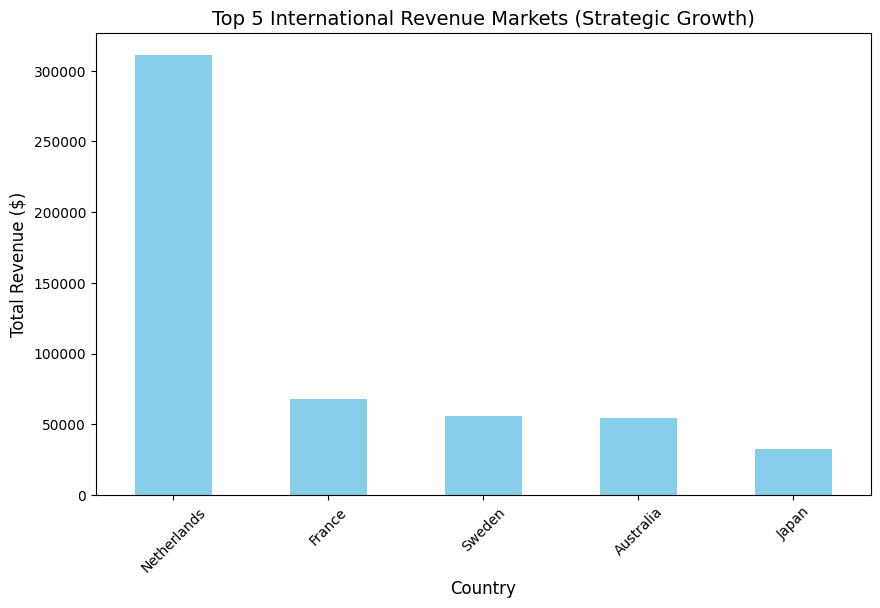

In [169]:
#plot
plt.figure(figsize=(10,6))
market_data.plot(kind='bar', color='skyblue')

plt.title('Top 5 International Revenue Markets (Strategic Growth)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [170]:
#Returns - Gross Sales vs Net Sales
#Transactions where money was sent back to customers

In [171]:
returns_query = """
SELECT
        country,
        COUNT(transactionno) AS total_returns_transactions,
        SUM(quantity*price) AS total_refunded_amount
FROM df
WHERE quantity < 0
group by country
order by total_refunded_amount desc
"""

In [172]:
returns_table = sqldf(returns_query, locals())
print("Returns Analysis by Country:")
print(returns_table)

Returns Analysis by Country:
               country  total_returns_transactions  total_refunded_amount
0   European Community                           1                 -29.22
1               Poland                           1                 -39.81
2         Saudi Arabia                           1                 -66.35
3               Cyprus                           6                -114.82
4      Channel Islands                           9                -149.05
5                Malta                          14                -208.12
6              Finland                           6                -374.29
7              Austria                           3                -598.96
8              Denmark                           8                -644.87
9              Belgium                          32                -784.90
10            Portugal                          10                -840.95
11      Czech Republic                           4                -917.64
12       

# Section 2: Market Health & Revenue Leakage

- Revenue Leakage detected and found the healthy market

In [173]:
#the net revenue, compare both//the leakage audit

In [174]:
return_rate_query = """
SELECT
        country,
        SUM(CASE WHEN quantity > 0 THEN quantity * price ELSE 0 END) AS gross_revenue,
        SUM(CASE WHEN quantity < 0 THEN quantity * price ELSE 0 END) AS total_refunds,
        (ABS(SUM(CASE WHEN quantity < 0 THEN quantity * price ELSE 0 END)) /
        SUM(CASE WHEN quantity > 0 THEN quantity * price ELSE 0 END)) * 100 AS return_rate_pct
FROM df
GROUP BY country
ORDER BY return_rate_pct DESC
"""

In [175]:
return_rate_table = sqldf(return_rate_query, locals())
print("Market Audit (Return Rate %):")
print(return_rate_table)

Market Audit (Return Rate %):
                 country  gross_revenue  total_refunds  return_rate_pct
0                    USA   3.284641e+04      -15418.27        46.940503
1         Czech Republic   7.674440e+03        -917.64        11.957094
2           Saudi Arabia   9.695000e+02         -66.35         6.843734
3                  Spain   2.808438e+05      -15273.47         5.438422
4         United Kingdom   5.234680e+07    -2491406.76         4.759426
5                  Japan   2.931554e+05       -9861.97         3.364075
6                   EIRE   1.711819e+06      -52765.88         3.082444
7                  Malta   1.271723e+04        -208.12         1.636520
8                Germany   1.369840e+06      -21277.87         1.553311
9                 Sweden   4.018799e+05       -5837.28         1.452494
10                 Italy   7.853624e+04       -1139.02         1.450311
11                France   1.329903e+06      -13758.64         1.034559
12           Switzerland   3.61692

/tmp/ipython-input-52002479.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data_risk, x='return_rate_pct', y='country', palette=colors)


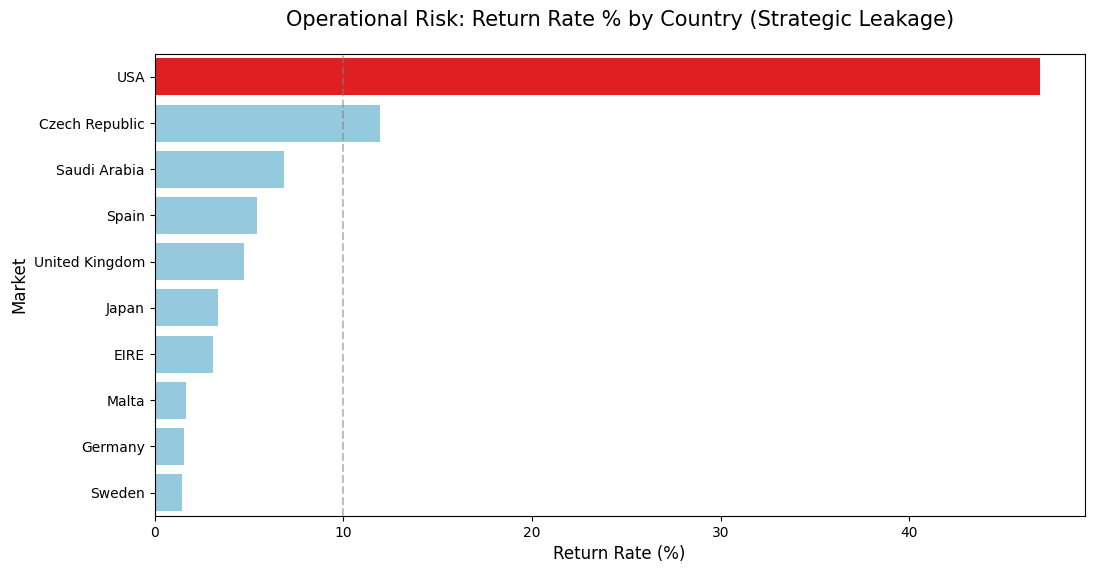

In [178]:
#Bar charts and market risk

import matplotlib.pyplot as plt
import seaborn as sns

#sorting top 10 for clarity
plot_data_risk = return_rate_table.sort_values('return_rate_pct', ascending=False).head(10)

plt.figure(figsize=(12, 6))

#USA in red
colors = ['red' if country == 'USA' else 'skyblue' for country in plot_data_risk['country']]

sns.barplot(data=plot_data_risk, x='return_rate_pct', y='country', palette=colors)

plt.title('Operational Risk: Return Rate % by Country (Strategic Leakage)', fontsize=15, pad=20)
plt.xlabel('Return Rate (%)', fontsize=12)
plt.ylabel('Market', fontsize=12)
plt.axvline(10, color='gray', linestyle='--', alpha=0.5) # A "Warning Line" at 10%
plt.show()

# Section 3: GLobal Sales Trends & Seasonality

- The peak month and which country leads each month

In [182]:
#ensuring Date is right and creating month

df['date'] = pd.to_datetime(df['date'])

df['Month'] = df['date'].dt.month_name()

In [183]:
monthly_trend_query = """
SELECT
        Month,
        SUM(quantity * price) AS monthly_revenue
FROM df
WHERE quantity > 0
GROUP BY Month
ORDER BY monthly_revenue DESC
"""

In [184]:
monthly_trend_query = sqldf(monthly_trend_query, locals())
print("Monthly Revenue Trend:")
print(monthly_trend_query)

Monthly Revenue Trend:
        Month  monthly_revenue
0    November     7.828490e+06
1     October     7.212280e+06
2    December     6.909718e+06
3   September     6.613773e+06
4      August     4.749801e+06
5        July     4.571495e+06
6         May     4.569952e+06
7     January     4.548423e+06
8        June     4.486050e+06
9       March     4.384670e+06
10      April     3.579310e+06
11   February     3.327343e+06


In [186]:
# Ensure only one month number column exists
if 'Month_num' in df.columns: # Check for the old capitalized version
    df = df.drop(columns=['Month_num'])
df['month_num'] = df['date'].dt.month # Assign the new lowercase version

In [187]:
#identify top country monthly sales

In [188]:
monthly_geography_query = """
SELECT
        Month,
        month_num, -- Consistent casing with df column
        SUM(country_revenue) AS total_monthly_revenue, -- Total revenue for the month (sum across all countries)
        MAX(CASE WHEN rn = 1 THEN country END) AS top_contributing_country,
        MAX(CASE WHEN rn = 1 THEN country_revenue END) AS revenue_from_top_country
FROM (
    SELECT
        Month,
        month_num, -- Consistent casing with df column
        country,
        SUM(quantity * price) AS country_revenue,
        ROW_NUMBER() OVER (PARTITION BY Month, month_num ORDER BY SUM(quantity * price) DESC) as rn
    FROM df
    WHERE quantity > 0
    GROUP BY Month, country, month_num
) AS RankedSales
GROUP BY Month, month_num
ORDER BY month_num
"""

In [189]:
monthly_geography_report = sqldf(monthly_geography_query, locals())
print("Chronological Monthly Report (Jan - Dec):")
print(monthly_geography_report)

Chronological Monthly Report (Jan - Dec):
        Month  month_num  total_monthly_revenue top_contributing_country  \
0     January          1             4548423.47           United Kingdom   
1    February          2             3327342.64           United Kingdom   
2       March          3             4384669.82           United Kingdom   
3       April          4             3579310.06           United Kingdom   
4         May          5             4569952.21           United Kingdom   
5        June          6             4486050.15           United Kingdom   
6        July          7             4571494.88           United Kingdom   
7      August          8             4749801.23           United Kingdom   
8   September          9             6613772.79           United Kingdom   
9     October         10             7212279.85           United Kingdom   
10   November         11             7828489.53           United Kingdom   
11   December         12             6909717.9

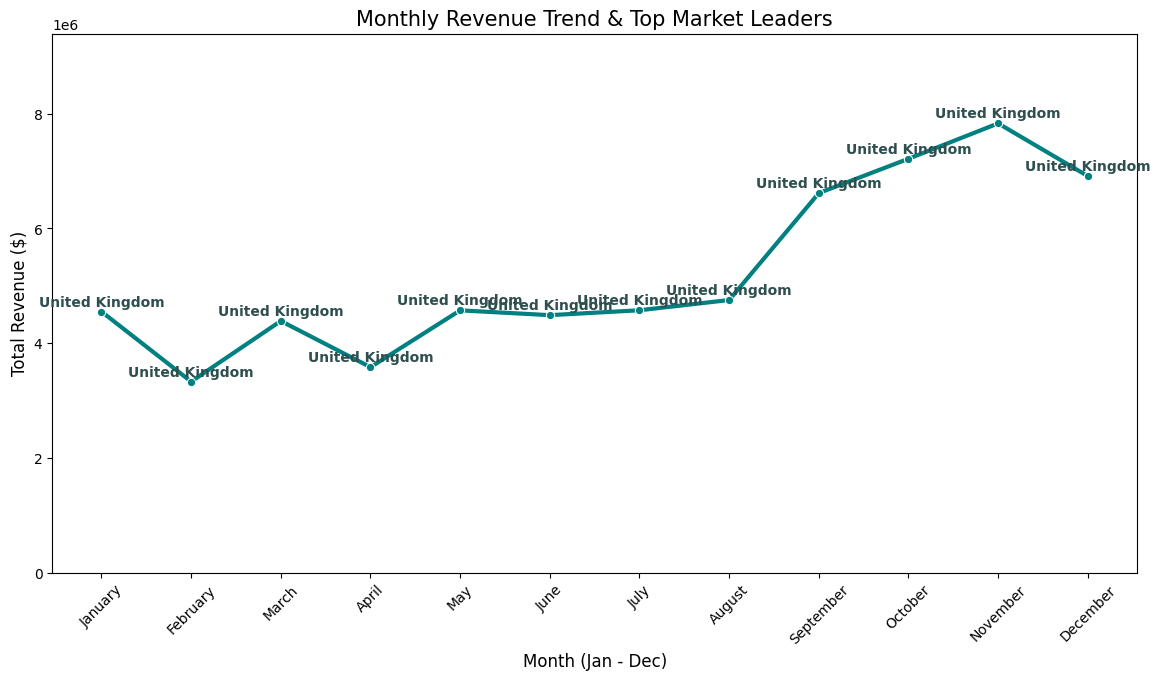

In [190]:
#line chart for the growth trend for top country in each month

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_geography_report, x='Month', y='total_monthly_revenue', marker='o', color='teal', linewidth=3)

# labels for top countries at each data point
for i in range(len(monthly_geography_report)):
    plt.text(i, monthly_geography_report.total_monthly_revenue[i] + 100000,
             monthly_geography_report.top_contributing_country[i],
             ha='center', fontsize=10, fontweight='bold', color='darkslategray')

plt.title('Monthly Revenue Trend & Top Market Leaders', fontsize=15)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xlabel('Month (Jan - Dec)', fontsize=12)
plt.ylim(0, monthly_geography_report['total_monthly_revenue'].max() * 1.2) # Give space for labels
plt.xticks(rotation=45)
plt.show()

# Section 4: Product popularity and profitability

- The hidden gem product that leads to high volume traffic drivers

In [191]:
#to find highest volume or high unit price
#APU, at least 1000 units

In [192]:
hiddengems_query = """
SELECT
        productname,
        SUM(quantity) AS total_units_sold,
        SUM(quantity * price) AS total_revenue,
        (SUM(quantity * price) / SUM(quantity)) AS average_unit
FROM df
WHERE quantity > 0
GROUP BY productname
HAVING total_units_sold >1000
ORDER BY total_revenue DESC
LIMIT 15
"""

In [193]:
hiddengems_table = sqldf(hiddengems_query, locals())
print("Hidden Gems (Top 15):")
print(hiddengems_table)

Hidden Gems (Top 15):
                           productname  total_units_sold  total_revenue  \
0            Paper Craft Little Birdie             80995     1002718.10   
1       Medium Ceramic Top Storage Jar             78033      881990.18   
2                       Popcorn Holder             56902      587222.66   
3    World War 2 Gliders Asstd Designs             54951      568722.59   
4   Cream Hanging Heart T-Light Holder             37937      484354.72   
5        Assorted Colour Bird Ornament             36394      420132.72   
6      Pack Of 72 Retrospot Cake Cases             36492      391241.08   
7                   Rabbit Night Light             30742      328529.51   
8             Regency Cakestand 3 Tier             13863      306900.94   
9              Jumbo Bag Red Retrospot             48375      296584.47   
10              Mini Paint Set Vintage             26633      287001.66   
11                       Party Bunting             18296      286412.55   
12 

/tmp/ipython-input-2046365494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_products, x='productname', y='average_unit', palette='magma')


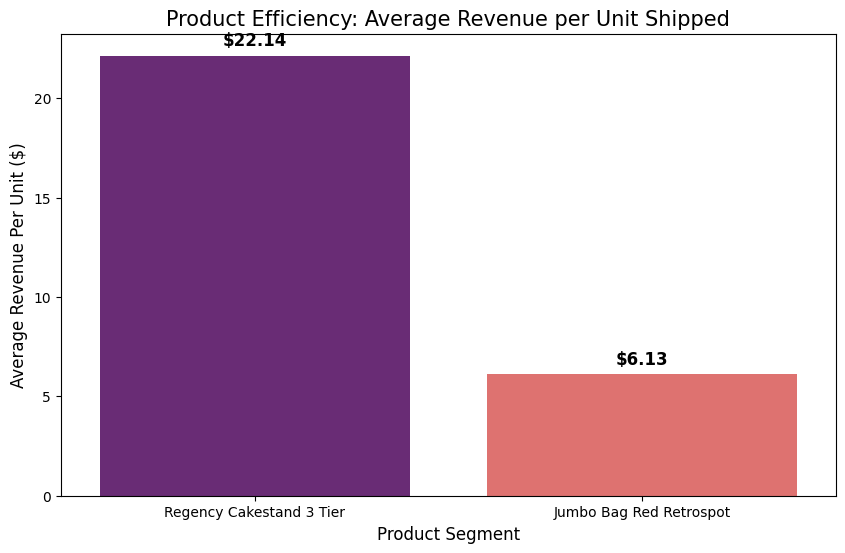

In [195]:
#comparing hidden gem products and volume

compare_products = hiddengems_table[hiddengems_table['productname'].isin(['Regency Cakestand 3 Tier', 'Jumbo Bag Red Retrospot'])]

plt.figure(figsize=(10, 6))
sns.barplot(data=compare_products, x='productname', y='average_unit', palette='magma')

plt.title('Product Efficiency: Average Revenue per Unit Shipped', fontsize=15)
plt.ylabel('Average Revenue Per Unit ($)', fontsize=12)
plt.xlabel('Product Segment', fontsize=12)

# Adding value labels on top of bars
for i, val in enumerate(compare_products['average_unit']):
    plt.text(i, val + 0.5, f'${val:.2f}', ha='center', fontsize=12, fontweight='bold')

plt.show()

# Section 5: Customer Loyalty & Retention

- Customer segmentation and royalty rate

In [196]:
#products each customer purchase in each transaction

In [197]:
#customer segmentation and average size (Wholesale bulk or Retail one two items)
insights_query = """
SELECT
    -- Average units per transaction
    AVG(total_units_per_order) AS Avg_size,

    -- Segmenting customers by total spend
    COUNT(CASE WHEN total_spent > 10000 THEN 1 END) AS Vip_customers,
    COUNT(CASE WHEN total_spent BETWEEN 1000 AND 10000 THEN 1 END) AS Regular_customers,
    COUNT(CASE WHEN total_spent < 1000 THEN 1 END) AS Occasional_customers
FROM (
    SELECT
        CustomerNo,
        TransactionNo,
        SUM(quantity) AS total_units_per_order,
        SUM(quantity * price) AS total_spent
    FROM df
    WHERE quantity > 0
    GROUP BY CustomerNo, TransactionNo
)
"""

insights = sqldf(insights_query, locals())
print("Customer Segmentation Data:")
print(insights)

Customer Segmentation Data:
     Avg_size  Vip_customers  Regular_customers  Occasional_customers
0  281.714185            839              12909                  6041


Customer Retention

In [198]:
print("Current Columns:", df.columns.tolist())

Current Columns: ['transactionno', 'date', 'productno', 'productname', 'price', 'quantity', 'customerno', 'country', 'Month', 'month_num']


In [199]:
df.columns = [c.strip().lower().replace(' ', '') for c in df.columns]

In [200]:
total_customers = df['customerno'].nunique()

repeat_customers_query = """
SELECT COUNT(*) AS count
FROM (
    SELECT customerno
    FROM df
    GROUP BY customerno
    HAVING COUNT(DISTINCT transactionno) > 1
)
"""

In [201]:
repeat_customers = sqldf(repeat_customers_query, locals()).iloc[0,0]

retention_rate = (repeat_customers / total_customers) * 100

In [202]:
print(f"\nTotal Unique Customers: {total_customers}")
print(f"Loyal Repeat Customers: {repeat_customers}")
print(f"Overall Retention Rate: {retention_rate:.2f}%")


Total Unique Customers: 4738
Loyal Repeat Customers: 3319
Overall Retention Rate: 70.05%


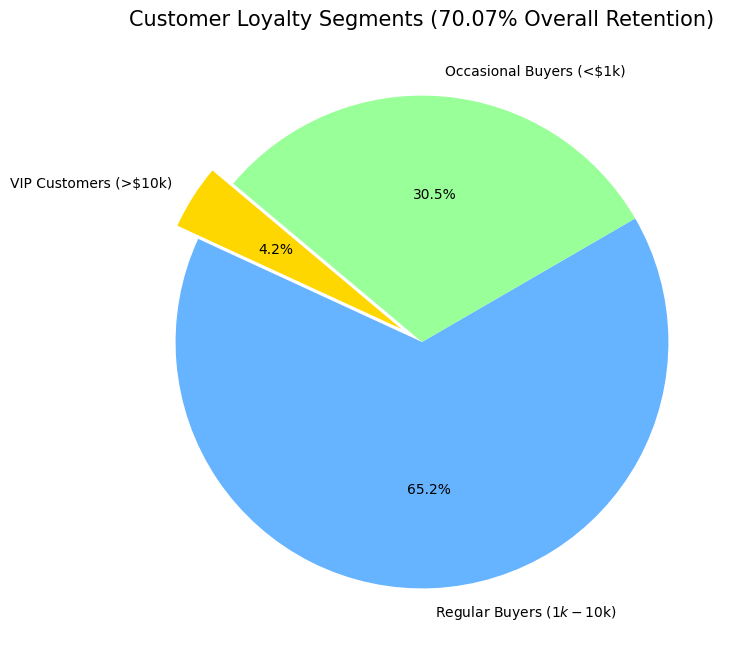

In [203]:
#loyalty plot
segment_labels = ['VIP Customers (>$10k)', 'Regular Buyers ($1k-$10k)', 'Occasional Buyers (<$1k)']
segment_sizes = [
    insights['Vip_customers'][0],
    insights['Regular_customers'][0],
    insights['Occasional_customers'][0]
]

plt.figure(figsize=(10, 8))
plt.pie(segment_sizes, labels=segment_labels, autopct='%1.1f%%',
        startangle=140, colors=['#FFD700', '#66b3ff', '#99ff99'], explode=(0.1, 0, 0))

plt.title('Customer Loyalty Segments (70.07% Overall Retention)', fontsize=15)
plt.show()

# Strategies moving forward

1. Logistic overhaul: to fic the USA return rate pipeline
2. Asian expansion: consider to launch Stationery and Home kits to other Asian countries
3. VIP Program Rewards: To maintain the high retention big buyers to lock in long term revenue